In [1]:
# Data from Nathan
hw_shoulder = [93.58974358974359, 5.128205128205128, 1.282051282051282]
rr_shoulder = [33.33333333333333, 43.75, 22.916666666666664]

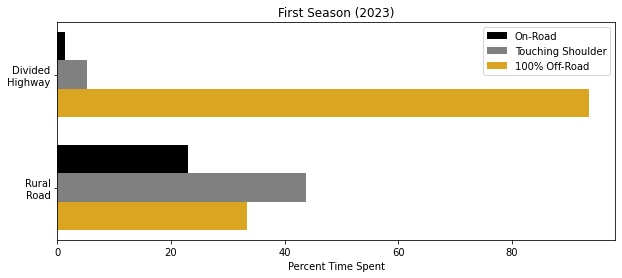

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

# Make bar numbers
bar_width = 0.25
x1 = np.arange(2)
x2 = [x + bar_width for x in x1]
x3 = [x + 2*bar_width for x in x1]

# Plot bars
ax.barh(x3, [rr_shoulder[2], hw_shoulder[2]], bar_width, label="On-Road", color="black")
ax.barh(x2, [rr_shoulder[1], hw_shoulder[1]], bar_width, label="Touching Shoulder", color="grey")
ax.barh(x1, [rr_shoulder[0], hw_shoulder[0]], bar_width, label="100% Off-Road", color="goldenrod")

# Labels
ax.legend()
ax.set_yticks(x2)
ax.set_yticklabels(["Rural\nRoad", "Divided\nHighway"])
ax.set_xlabel("Percent Time Spent")
ax.set_title("First Season (2023)")
fig.set_size_inches(10,4)

Text(0.5, 1.0, 'Second Season (2024)')

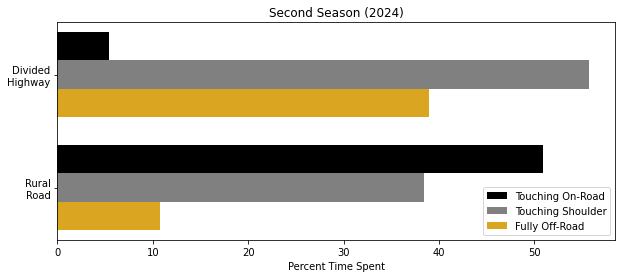

In [14]:
# Data from 2024-12-05 slides
data = {
    # Category: [rural, highway]
    "Touching On-Road": [50.9, 5.4],
    "Touching Shoulder": [38.4, 55.7],
    "Fully Off-Road": [100-(50.9+38.4), 100-(5.4+55.7)]
}
x = {
    "Touching On-Road":  x3,
    "Touching Shoulder": x2,
    "Fully Off-Road":    x1
}
color = {
    "Touching On-Road":  "black",
    "Touching Shoulder": "grey",
    "Fully Off-Road":    "goldenrod"
}

# Plot bars
plt.figure(figsize=(10,4))
for cat in data:
    plt.barh(x[cat], data[cat], bar_width, label=cat, color=color[cat])

# Labels
plt.legend()
plt.yticks(ticks=x2, labels=["Rural\nRoad", "Divided\nHighway"])
plt.xlabel("Percent Time Spent")
plt.title("Second Season (2024)")

In [17]:
# More data from Nathan, reformatted more betterer
hw_obstacles = {
    'Sign': {"see": 142, "touch": 15, "break": 1},
    'Post': {"see": 425, "touch": 169, "break": 23},
    'Mailbox': {"see": 0, "touch": 0, "break": 0},
    'Telephone\nPole': {"see": 0, "touch": 0, "break": 0},
    'Cone': {"see": 24, "touch": 18, "break": 1},
    'Branches': {"see": 0, "touch": 0, "break": 0},
    'Drain': {"see": 4, "touch": 0, "break": 0},
    'Roadkill': {"see": 4, "touch": 0, "break": 0},
    'Guardrail': {"see": 2, "touch": 0, "break": 0},
    'Trash': {"see": 1, "touch": 1, "break": 0},
}

rr_obstacles = {
    'Sign': {"see": 838, "touch": 133, "break": 10},
    'Post': {"see": 271, "touch": 66, "break": 8},
    'Mailbox': {"see": 213, "touch": 0, "break": 1},
    'Telephone\nPole': {"see": 47, "touch": 2, "break": 00},
    'Cone': {"see": 2, "touch": 0, "break": 0},
    'Branches': {"see": 29, "touch": 6, "break": 1},
    'Drain': {"see": 19, "touch": 0, "break": 0},
    'Roadkill': {"see": 6, "touch": 1, "break": 0},
    'Guardrail': {"see": 1, "touch": 0, "break": 0},
    'Trash': {"see": 1, "touch": 0, "break": 0},
}

In [18]:
import matplotlib.pyplot as plt
import numpy as np

bar_width = 0.25
HW_DIST = 41.8
RR_DIST = 68.5

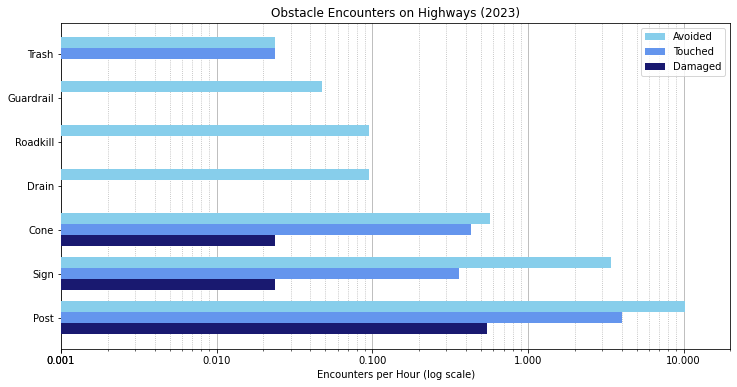

In [27]:
plt.figure(figsize=(12,6))

# Get list of obstacles for dataset
smbars = []
for obs in hw_obstacles:
    if sum(hw_obstacles[obs].values()) != 0:
        smbars.append(obs)
smbars = sorted(smbars, key=lambda x: hw_obstacles[x]["see"], reverse=True)

# Plot bars
xx = np.arange(len(smbars))
plt.barh(xx+bar_width, [hw_obstacles[i]["see"]/HW_DIST for i in smbars], height=bar_width, label="Avoided", color="skyblue", zorder=10)
plt.barh(xx, [hw_obstacles[i]["touch"]/HW_DIST for i in smbars], height=bar_width, label="Touched", color="cornflowerblue", zorder=10)
plt.barh(xx-bar_width, [hw_obstacles[i]["break"]/HW_DIST for i in smbars], height=bar_width, label="Damaged", color="midnightblue", zorder=10)

# Adjust axes and gridlines
plt.xscale("log")
plt.grid(True, "major", "x", zorder=1)
plt.grid(True, "minor", "x", linestyle=":", zorder=1)
plt.xlim(0.001,20)

# Format tick labels
plt.yticks(ticks=xx, labels=smbars)
xt = [0.001] # for the "0" position
b0 = max([rr_obstacles[i]["see"]/RR_DIST for i in smbars])
for x in [float(x) for x in plt.xticks()[0]]:
    if x > b0: break
    if x < xt[0]: pass
    else: xt.append(x)
plt.xticks(ticks=xt, labels=[f"{x:.3f}" for x in xt])

plt.legend()
plt.title("Obstacle Encounters on Highways (2023)")
plt.xlabel("Encounters per Hour (log scale)")
plt.show()

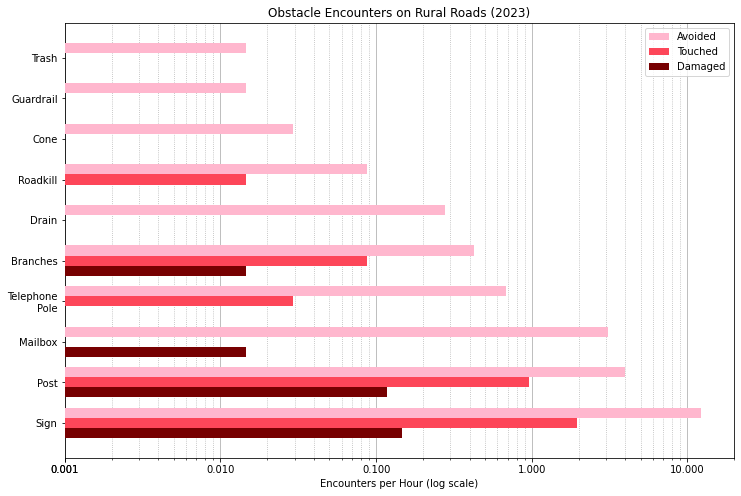

In [26]:
plt.figure(figsize=(12,8))

# Get list of obstacles for dataset
smbars = list(rr_obstacles.keys())
smbars = sorted(smbars, key=lambda x: rr_obstacles[x]["see"], reverse=True)

# Plot bars
xx = np.arange(len(smbars))
plt.barh(xx+bar_width, [rr_obstacles[i]["see"]/RR_DIST for i in smbars], height=bar_width, label="Avoided", color="xkcd:baby pink", zorder=10)
plt.barh(xx, [rr_obstacles[i]["touch"]/RR_DIST for i in smbars], height=bar_width, label="Touched", color="xkcd:watermelon", zorder=10)
plt.barh(xx-bar_width, [rr_obstacles[i]["break"]/RR_DIST for i in smbars], height=bar_width, label="Damaged", color="xkcd:blood", zorder=10)

# Adjust axes and gridlines
plt.xscale("log")
plt.grid(True, "major", "x", zorder=1)
plt.grid(True, "minor", "x", linestyle=":", zorder=1)
plt.xlim(0.001,20)

# Format tick labels
plt.yticks(ticks=xx, labels=smbars)
xt = [0.001] # for the "0" position
b0 = max([rr_obstacles[i]["see"]/RR_DIST for i in smbars])
for x in [float(x) for x in plt.xticks()[0]]:
    if x > b0: break
    if x < xt[0]: pass
    else: xt.append(x)
plt.xticks(ticks=xt, labels=[f"{x:.3f}" for x in xt])

plt.legend()
plt.title("Obstacle Encounters on Rural Roads (2023)")
plt.xlabel("Encounters per Hour (log scale)")
plt.show()
